# Numpy

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

import rasterio
from rasterio.plot import plotting_extent, show

## Introduction

On of the most fundamental parts of the scientific python 'ecosystem' is [numpy](https://numpy.org/). A lot of other packages - you already used Pandas and GeoPandas in this course - are built on top of Numpy and the `ndarray`  (n-dimensional array) data type it provides. 

In [5]:
import numpy as np

Let's start again from reading in a GeoTiff data set from file, thiss time a Sentinal Band 4 of the City of Ghent:

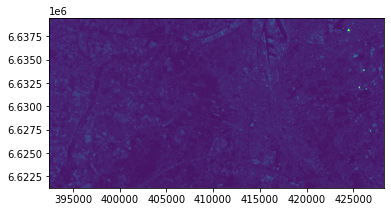

In [6]:
with rasterio.open("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff") as src:
    b4_data = src.read()
    b4_data_meta = src.meta
    show(src)

As we learnt in the previous lesson, Rasterio returns a Numpy `ndarray`:

In [7]:
type(b4_data)

numpy.ndarray

In [8]:
b4_data

array([[[ 5125,  5793, 11475, ...,  6776,  6816,  5662],
        [ 6698,  4974,  5603, ...,  4797,  4306,  4293],
        [ 6626,  5243,  5046, ...,  4509,  4804,  4620],
        ...,
        [ 4764,  4863,  4463, ...,  9234,  6606,  4476],
        [ 4607,  4555,  4404, ...,  4810,  5833,  3926],
        [ 4627,  4902,  4745, ...,  3781,  4430,  5439]]], dtype=uint16)

Numpy supports different `dtype`s (`float`, `int`,...), but all elements of an array do have the same dtype. Note that NumPy auto-detects the data-type from the input.

In [9]:
b4_data.dtype

dtype('uint16')

The data type of this specific array `b4_data` is 16bit unsigned integer. More information on the data types Numpy supports is available in the [documentation](https://numpy.org/devdocs/user/basics.types.html#array-types-and-conversions-between-types). Detailed info on data types is out of scope of this course, but remember that using 16bit unsigned integer, it can contain `2**16` different (all positive) integer values:

In [10]:
2**16

65536

Let's check this by calculating the minimum and maximum value in the array:

In [11]:
b4_data.min(), b4_data.max()

(0, 65535)

Converting to another data type is supported by `astype` method. When floats are preferred during calculation:

In [12]:
b4_data.astype(float)

array([[[ 5125.,  5793., 11475., ...,  6776.,  6816.,  5662.],
        [ 6698.,  4974.,  5603., ...,  4797.,  4306.,  4293.],
        [ 6626.,  5243.,  5046., ...,  4509.,  4804.,  4620.],
        ...,
        [ 4764.,  4863.,  4463., ...,  9234.,  6606.,  4476.],
        [ 4607.,  4555.,  4404., ...,  4810.,  5833.,  3926.],
        [ 4627.,  4902.,  4745., ...,  3781.,  4430.,  5439.]]])

In [13]:
b4_data.max()

65535

Just as any other object in Python, the `ndarray` has a number of attributes. We already checkes the `dtype` attribute. The `shape` and `ndim` of the array are other relevant attribute:

In [14]:
b4_data.shape, b4_data.ndim

((1, 317, 625), 3)

Hence, we have a single band with dimensions (317, 625) and data type `uint16`. Compare this to the metadata stored in the geotiff file:

In [17]:
#!gdalinfo ./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff

The metadata on the dimensions and the datatype correspond, but the spatial information is lost when we only store the Numpy array.

Numpy works very well together with the other fundamental scientific Python package [Matplotlib](https://matplotlib.org/). An useful plot function to know when working with raster data is `imshow`:

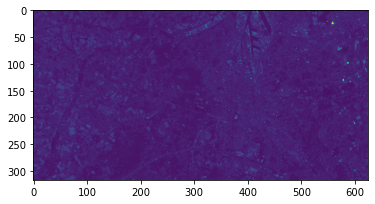

In [18]:
fig, ax = plt.subplots()
ax.imshow(b4_data.squeeze());

__Note:__ Numpy function `squeeze` used to get rid of the single-value dimension of the numpy array.

As the Numpy array does not contain any spatial information, the x and y axis labels are defined by the indices of the array. Remark that the Rasterio plot returned this plot with the coordinate information in the axis labels. 

With a small trick, the same result can be achieved with Matplotlib:

1. When reading in a data set using Rasterio, use the `plotting_extent` function from rasterio to get the spatial extent:

In [20]:
from rasterio.plot import plotting_extent

with rasterio.open("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff") as src:
    b4_data = src.read()
    b4_data_meta = src.meta
    b4_data_extent = plotting_extent(src)  # NEW

In [21]:
b4_data_extent

(392465.9217302375, 428295.7787389139, 6621281.1381751085, 6639492.260164049)

2. Add the `extent` argument to the `imshow` plot

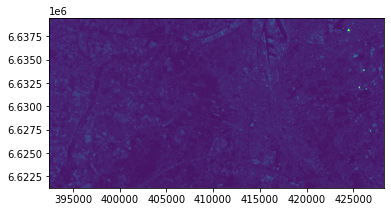

In [22]:
fig, ax = plt.subplots()
ax.imshow(b4_data.squeeze(), extent=b4_data_extent)

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

The [`numpy` package](https://numpy.org/) is the backbone of the scientific Python ecosystem. The `ndarray` provides an efficient data type to store and manipulate raster data, but it does NOT contain any spatial information.
    
Use the spatial `extent` trick to add coordinate information to imshow plot axis. Convert to the preferred datatype using `astype` method.

</div>

## Reshape, slice and index

In [23]:
b4_data.shape

(1, 317, 625)

We already used `squeeze` to remove the single-value dimension. We could also select the data we needed, similar to slicing in lists or Pandas DataFrames:

In [24]:
b4_data[0]

array([[ 5125,  5793, 11475, ...,  6776,  6816,  5662],
       [ 6698,  4974,  5603, ...,  4797,  4306,  4293],
       [ 6626,  5243,  5046, ...,  4509,  4804,  4620],
       ...,
       [ 4764,  4863,  4463, ...,  9234,  6606,  4476],
       [ 4607,  4555,  4404, ...,  4810,  5833,  3926],
       [ 4627,  4902,  4745, ...,  3781,  4430,  5439]], dtype=uint16)

In [25]:
b4 = b4_data[0]
b4.shape

(317, 625)

If you do not like the order of dimensions of the data, you can switch these using `transpose`:

In [26]:
b4.transpose(1, 0).shape

(625, 317)

Getting rid of the dimensions and flattening all values into a single 1-D array can be done using `flatten` method:

In [27]:
b4.flatten().shape

(198125,)

Flattening an arrya is useful to create a histogram with Matplotlib:

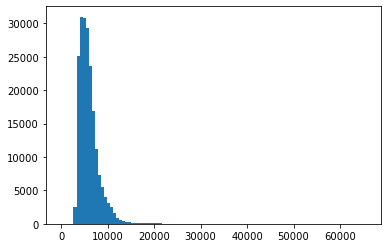

In [28]:
plt.hist(b4.flatten(), bins=100);

In [29]:
# slice, subsample, reverse
# slice + assign
# fancy indexing
# fancy indexing + assign

In [30]:
b4 = b4_data[0]

Select a specific row/column:

In [31]:
b4[10].shape

(625,)

In [32]:
b4[:, -2:].shape

(317, 2)

Select every nth element in a given dimension:

In [33]:
b4[100:200:10, :].shape

(10, 625)

Reversing an array:

In [34]:
b4[:, ::-1].shape  # Note you can also np.flip an array

(317, 625)

In [35]:
b4[0, :4]

array([ 5125,  5793, 11475, 10866], dtype=uint16)

In [36]:
b4_rev = b4[:, ::-1]
b4_rev[0, -4:]

array([10866, 11475,  5793,  5125], dtype=uint16)

You can also combine assignment and slicing:

In [37]:
b4[0, :3] = 10
b4

array([[  10,   10,   10, ..., 6776, 6816, 5662],
       [6698, 4974, 5603, ..., 4797, 4306, 4293],
       [6626, 5243, 5046, ..., 4509, 4804, 4620],
       ...,
       [4764, 4863, 4463, ..., 9234, 6606, 4476],
       [4607, 4555, 4404, ..., 4810, 5833, 3926],
       [4627, 4902, 4745, ..., 3781, 4430, 5439]], dtype=uint16)

Use a __condition__ to select data, also called fancy indexing or boolean indexing:

In [38]:
b4 < 1000

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Onle keep the data which are True for the given condition

In [39]:
b4[b4 < 1000]

array([ 10,  10,  10,   0,   0,   0,   0,  46,   0, 524], dtype=uint16)

Or combine assignment and fancy indexing, e.g. a reclassification of the raster data:

In [40]:
b4[b4 < 5000] = 0  # assign the value 0 to all elements with a value lower than 5000

In [41]:
b4

array([[   0,    0,    0, ..., 6776, 6816, 5662],
       [6698,    0, 5603, ...,    0,    0,    0],
       [6626, 5243, 5046, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 9234, 6606,    0],
       [   0,    0,    0, ...,    0, 5833,    0],
       [   0,    0,    0, ...,    0,    0, 5439]], dtype=uint16)

A powerfull shortcut to handle this kind or reclassifications is the `np.where` function:

In [42]:
np.where(b4 < 5000, 10, b4)

array([[  10,   10,   10, ..., 6776, 6816, 5662],
       [6698,   10, 5603, ...,   10,   10,   10],
       [6626, 5243, 5046, ...,   10,   10,   10],
       ...,
       [  10,   10,   10, ..., 9234, 6606,   10],
       [  10,   10,   10, ...,   10, 5833,   10],
       [  10,   10,   10, ...,   10,   10, 5439]], dtype=uint16)

<div class="alert alert-success">

**EXERCISE**:

* Read in the file `./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` with rasterio and assign the data to a new variable `tc_data`.  
* Select only the *second* layer of `tc_data` and assign the output to a new variable `tc_g`.
* Assign to each of the elements in the `tc_g` array with a value above 15000 the new value 65535.
    
<details><summary>Hints</summary>

* You can combine the assignment of new values together with fancy indexing of a numpy array.
* Python (and also Numpy) uses 0 as the first-element index

</details>
    
</div>

In [43]:
with rasterio.open("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff") as src:
    tc_data = src.read()

In [44]:
# Get the green channel
tc_g = tc_data[1]

In [45]:
# Convert all values above 15000
tc_g[tc_g > 15000] = 65535
tc_g

array([[65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 14221, 13779],
       [65535, 65535, 65535, ..., 14631, 65535, 65535],
       ...,
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 14516, 65535, 65535],
       [65535, 65535, 65535, ..., 13844, 65535, 65535]], dtype=uint16)

<div class="alert alert-success">

**EXERCISE**:

Subsample the ndarray `tc_data` by taking only the one out of each 5 data points for all layers at the same time (Be aware that this is a naive resampling implementation for educational purposes only). 
    
<details><summary>Hints</summary>

* The result should still be a 3-D array with 3 elements in the first dimension.

</details>   
    
</div>

In [46]:
with rasterio.open("./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff") as src:
    tc_data = src.read()

In [47]:
# subsample the data
tc_data[:, ::5, ::5].shape

(3, 64, 125)

<div class="alert alert-success">

**EXERCISE**:

Elements with the value `65535` do represent 'Not a number' (Nan) values. However, Numpy does not support Nan values for integer data, so we'll convert to float first as data type. After reading in the data set `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04_(Raw).tiff` (assign data to variable `b4_data`):
    
* Count the number of elements that are equal to `65535`
* Convert the data type to `float`, assign the result to  a new variable `b4_data_f`
* Assign Nan (`np.nan`) value to each of the elements of `b4_data_f` equal to `65535`
* Count the number of Nan values in the `b4_data_f` data
* Make a histogram of both the `b4_data` and `b4_data_f` data. Can you spot the difference?
    
    
<details><summary>Hints</summary>

* `np.nan` represents _Not a Number (Nan)_ in Numpy. You can assign an element to it, e.g. `dummy[2] = np.nan`
* `np.sum` will by default sum all of the elements of the input array and can also count boolean values (True = 1 and False = 0), resulting from a conditional expression. 
* To test if a value is a nan, Numpy provides `np.isnan(...)` which results in an element-wise check returning boolean values.
* Check the help of the `plt.hist` command to find out more about the `bins` and the `log` arguments.

</details>    
    
   
</div>

In [48]:
with rasterio.open("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff") as src:
    b4_data = src.read()

In [49]:
# Count the number of cells with value 65535
np.sum(b4_data == 65535)

30

In [50]:
# Convert to float and make 65535 equal to Nan
b4_data_f = b4_data.astype(float)
b4_data_f[b4_data == 65535] = np.nan

In [52]:
# Count the number of cells with value 0
np.sum(np.isnan(b4_data_f))

30

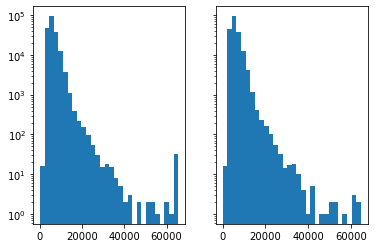

In [53]:
# Create the histogram plots
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
ax0.hist(b4_data.flatten(), bins=30, log=True);
ax1.hist(b4_data_f.flatten(), bins=30, log=True);

## Reductions, element-wise calculations and broadcasting

Up until now, we worked with the 16bit integer values. For specific applications we might want to rescale this data. A (fake) example is the linear transformation to the range 0-1 after log conversion of the data. To do so, we need to calculate _for each element_ in the original $b$ array the following:

$$x_i= \log(b_i)$$
$$z_i=\frac{x_i-\min(x)}{\max(x)-\min(x)}$$

__1. reductions__

As part of it, we need the minimum `min(x)` and the maximum `max(x)` of the array. These __reductions__ (aggregations) are provided by Numpy and can be applied along one or more of the data dimensions, called the __axis__:

In [54]:
dummy = np.arange(1, 10).reshape(3, 3)
dummy

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [55]:
np.min(dummy), np.min(dummy, axis=0), np.min(dummy, axis=1)

(1, array([1, 2, 3]), array([1, 4, 7]))

In [56]:
dummy = np.arange(1, 25).reshape(2, 3, 4)
dummy.shape, dummy

((2, 3, 4),
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]]))

In [57]:
np.min(dummy), np.min(dummy, axis=0), np.min(dummy, axis=(0, 1)), np.min(dummy, axis=(0, 2))

(1,
 array([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]]),
 array([1, 2, 3, 4]),
 array([1, 5, 9]))

In some applications, the usage of the `keepdims=True` is useful to keep the number of dimensions after reduction:

In [58]:
np.min(dummy, axis=(0, 2), keepdims=True)

array([[[1],
        [5],
        [9]]])

When working with Nan values, the result will be Nan as well:

In [59]:
np.min(np.array([1., 2., np.nan]))

nan

Use the `nanmin`, `nan...` version of the function instead, if available:

In [60]:
np.nanmin(np.array([1., 2., np.nan]))

1.0

__2. Element-wise__

The __for each element__ is crucial for Numpy. The typical answer in programming would be a `for`-loop, but Numpy is optimized to do these calculations __element-wise__ (i.e. for all elements together):

In [61]:
dummy = np.arange(1, 10)
dummy

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
dummy*10

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

Instead of:

In [63]:
[el*20 for el in dummy]

[20, 40, 60, 80, 100, 120, 140, 160, 180]

Numpy provides most of the familiar arithmetic operators to apply on an element-by-element basis:

In [64]:
np.exp(dummy), np.sin(dummy), dummy**2, np.log(dummy)

(array([2.71828183e+00, 7.38905610e+00, 2.00855369e+01, 5.45981500e+01,
        1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
        8.10308393e+03]),
 array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
        -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849]),
 array([ 1,  4,  9, 16, 25, 36, 49, 64, 81]),
 array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
        1.79175947, 1.94591015, 2.07944154, 2.19722458]))

For some function, you can either use the `np.min(my_array)` or the `my_array.min()` approach:

In [65]:
dummy.min() == np.min(dummy)

True

__3. Broadcasting__

When we combine arrays with different shapes during arithmetic operations, Numpy applies a set of __broadcoasting__ rules and the smaller array is _broadcast_ across the larger array so that they have compatible shapes. An important consequence for out application is:

In [66]:
np.array([1, 2, 3]) + 4. , np.array([1, 2, 3]) + np.array([4.]), np.array([1, 2, 3]) + np.array([4., 4., 4.])

(array([5., 6., 7.]), array([5., 6., 7.]), array([5., 6., 7.]))

The smallest array is broadcasted to make both compatible. It starts with the trailing (i.e. rightmost) dimensions. Exploring all the rules are out of scope in this lesson and are well explained in the [boradcasting Numpy documentation](https://numpy.org/devdocs/user/basics.broadcasting.html#general-broadcasting-rules). 

__Back to our function__

By combining these three elements, we know enough to translate our conversion into Numpy code on the example data set:

In [ ]:
with rasterio.open("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff") as src:
    b4_data = src.read()
b4_data = b4_data.squeeze().astype(float)    # squeeze and convert to float
b4_data[b4_data == 0.0] = 0.00001  # to overcome zero-division error

Take the log of al the values __element-wise__:

In [69]:
b4_data_log = np.log(b4_data)

Get the min and max __reductions__:

In [70]:
b4_min, b4_max = b4_data_log.min(), b4_data_log.max()

__Broadcast__ our single value `b4_min` and `b4_max` to all elements of `b4_data_log`:

In [71]:
b4_rescaled = ((b4_data_log - b4_min)/(b4_max - b4_min))

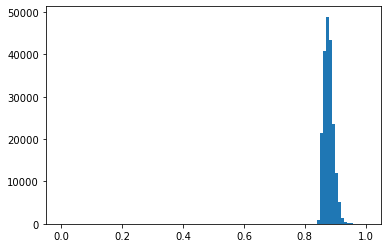

In [72]:
plt.hist(b4_rescaled.flatten(), bins=100);

__Remark 1:__ One-dimensional linear interpolation towards a new value range can be calculated using the `np.interp` function as well. For the range 0 -> 1: 

```
np.interp(b4_data, (b4_data.min(), b4_data.max()), (0, 1))
```

__Remark 2: Why not iterate over the values of a list?__

Let's use the  rescaling example to compare the calculation with Numpy versus a list comprehension (for-loop in Python):

In [73]:
b4_min, b4_max = b4_data.min(), b4_data.max()

With Numpy:

In [74]:
%%time
rescaled_values_1 = ((b4_data - b4_min)/(b4_max - b4_min))

CPU times: user 2 ms, sys: 469 µs, total: 2.47 ms
Wall time: 1.05 ms


Using a list with a for loop:

In [75]:
b4_as_list = b4_data.flatten().tolist()

In [76]:
%%time
rescaled_values_2 = [((data_point - b4_min)/(b4_max - b4_min)) for data_point in b4_as_list]

CPU times: user 64.2 ms, sys: 7.01 ms, total: 71.2 ms
Wall time: 70.1 ms


In [77]:
np.allclose(rescaled_values_1.flatten(), rescaled_values_2)  # np.allclose also works element wise

True

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

The combination of element-wise calculations, efficient reductions and broadcasting provides Numpy a lot of power. In general, it is a good advice to __avoid for loops__ when working with Numpy arrays.

</div>

### Let's practice!

<div class="alert alert-success">

**EXERCISE**:

The data set `./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` (assign to variable `herstappe_data`) contains 3 bands. The `imshow` function of Matplotlib can plot 3-D (RGB) data sets, but when running `plt.imshow(herstappe_data)`, we got the following error:
    
    ```
    ...
    TypeError: Invalid shape (3, 227, 447) for image data
    ```

- Check in the help op `plt.imshow` why the `herstappe_data` can not be plot as such
- Adjust the data to fix the behavior of `plt.imshow(herstappe_data)`
    
Next, plot a greyscale version of the data as well. Instead of using a custom function just rely on the sum of the 3 bands as a proxy.
    
<details><summary>Hints</summary>

* In a Jupyter Notebook, us the SHIFT-TAB combination when the cursor is on the `imshow` function or type in a new cell `?plt.imshow` to see the documentation of a function.
* Add the extent to see the coordinates in the axis labels.
* A greyscale image requires a greyscale `cmap`, checkt he available names in [the documentation online](https://matplotlib.org/tutorials/colors/colormaps.html)

</details>    
    
</div>

In [78]:
with rasterio.open("./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff") as src:
    herstappe_data = src.read()
    herstappe_extent = plotting_extent(src)

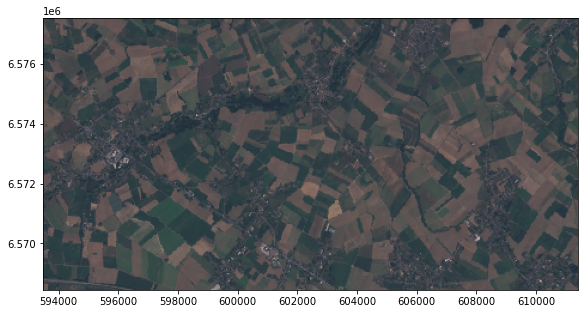

In [79]:
# Make a RGB plot
fig, ax = plt.subplots(figsize=(12, 5))
plt.imshow(herstappe_data.transpose(1, 2, 0), extent=herstappe_extent);

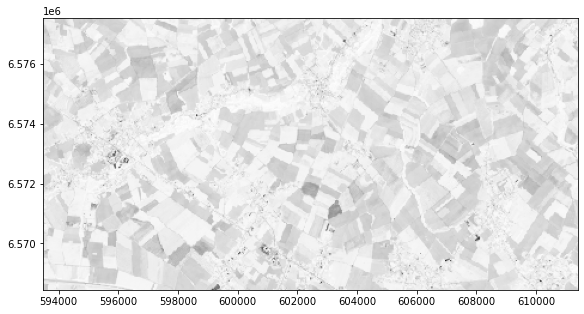

In [80]:
# Make a Grey scale plot
greyscale_data = herstappe_data.sum(axis=0)
fig, ax = plt.subplots(figsize=(12, 5))
plt.imshow(greyscale_data, extent=herstappe_extent, cmap="Greys");

<div class="alert alert-success">

**EXERCISE**:

The data set `./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` (assign to variable `herstappe_data`) has values ranging in between 0.11325, 0.8575. To improve the quality of the visualisation, stretch __each of the layers individually__ to the values to the range 0. to 1. with a linear transformation: 
    
$$z_i=\frac{x_i-\min(x)}{\max(x)-\min(x)}$$

Make a plot of the end result and compare with the plots of the previous exercise. 
   
<details><summary>Hints</summary>

* Keep into account that the data set is 3-dimensional. Have a look at the optional arguments for the reduction/aggregation functions in terms of `axis` and `keepdims`. 
* You need the minimal/maximal value over 2 axis to end up with a min/max for each of the layers.
* Broadcasting starts comparison of the alignment on the last dimension.

</details>    
    
</div>

In [81]:
with rasterio.open("./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff") as src:
    herstappe_data = src.read()
    herstappe_extent = plotting_extent(src)

In [82]:
# Calculate the min and max for each channel
h_min = herstappe_data.min(axis=(1, 2), keepdims=True)
h_max = herstappe_data.max(axis=(1, 2), keepdims=True)

In [83]:
# Rescale the data
herstappe_rescaled = ((herstappe_data - h_min)/(h_max - h_min))

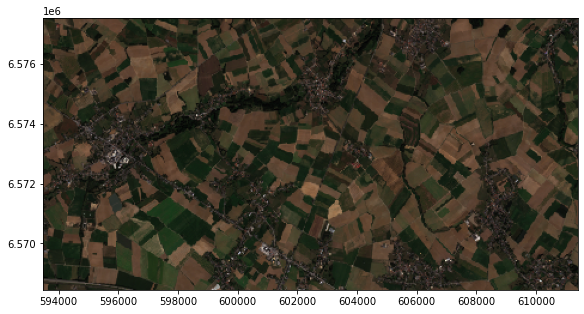

In [84]:
# Make a plot
fig, ax = plt.subplots(figsize=(12, 5))
plt.imshow(herstappe_rescaled.transpose(1, 2, 0), extent=herstappe_extent);

<div class="alert alert-success">

**EXERCISE**:
    
You want to reclassify the values of the 4th band data to a fixed set of classes:
    
* x < 0.05 need to be 10
* 0.05 < x < 0.1 need to be 20
* x > 0.1 need to be 30
       
Use the data set `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04_(Raw).tiff` (assign data to variable `b4_data`):
    
* Read the data set and exclude the single-value dimension to end up with a 2D array. 
* Convert to float data type. and normalize the values to the range [0., 1.].
* Create a new variable `b4_data_classified` with the same shape as `b4_data` but datatype int.
* Assign the new values (10, 20, 30) to the elements for which each of the conditions apply. 
* Make a image plot of the reclassified variable `b4_data_classified`.
    
</div>

In [87]:
with rasterio.open("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff") as src:
    b4_data = src.read()
    b4_data_extent = plotting_extent(src)

In [ ]:
# Squeez to 2D float array 
b4_data = b4_data.squeeze().astype(float)

In [88]:
# Rescale the data
b4_data = (b4_data - b4_data.min())/(b4_data.max() - b4_data.min())

In [89]:
# Create a new array with the same shape as the original b4_data
b4_data_classified = np.empty_like(b4_data).astype(int)

In [90]:
# Assign the new values according to the classes
b4_data_classified[b4_data < 0.05] = 10
b4_data_classified[(0.05 <= b4_data) & (b4_data < 0.1)] = 20
b4_data_classified[0.1 <= b4_data] = 30

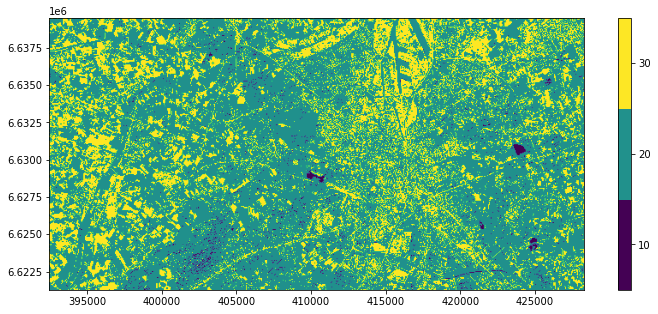

In [91]:
# Create an image plot
fig, ax = plt.subplots(figsize=(12, 5))
img = ax.imshow(b4_data_classified, extent=b4_data_extent)
fig.colorbar(img, values=[10, 20, 30], ticks=[10, 20, 30])

<div class="alert alert-success">

**EXERCISE**:

The data sets `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff` and `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B08.tiff` contain respectively the 4th and the 8th band of a sentinel satellite image. To derive the [Normalized Difference Vegetation Index) (NDVI)](https://nl.wikipedia.org/wiki/Normalized_Difference_Vegetation_Index), the two bands need to be combined as follows:
    
$$\frac{band_8 - band_4}{band_8 + band_4} $$
    
Process the images and create a plot of the NDVI:
    
- Read both data sets using Rasterio and store them in resp. `b4_data` and `b8_data`. 
- Combine both data sets using the `np.vstack` function and assign it to the variable `b48_bands`
- Transform the data range of each of the layers to the range .0 - 1.
- For the values equal to zero in the `b48_bands` data set, assign a new (very small) value 1e-6
- Calculate the NDVI
- Plot the NDVI and select an appropriate colormap.
    
<details><summary>Hints</summary>

* For more specific adjustments to the colormap, have a check on the [Matplotlib documentation on colormap normalization](https://matplotlib.org/3.3.2/tutorials/colors/colormapnorms.html)

</details>   
           
</div>

In [94]:
with rasterio.open("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff") as src:
    b4_data = src.read()
    b4_extent = plotting_extent(src)
with rasterio.open("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B08.tiff") as src:
    b8_data = src.read() 

In [95]:
# Combine both arrays by stacking them together
b48_bands = np.vstack((b4_data, b8_data))  # 0 is b4 and 1 is b8

In [ ]:
# Rescale the data to 0-1
b48_min = b48_bands.min(axis=(1, 2), keepdims=True)
b48_max = b48_bands.max(axis=(1, 2), keepdims=True)
b48_bands = ((b48_bands - b48_min)/(b48_max - b48_min))

In [97]:
# Assign very small value to 0-values
b48_bands[b48_bands == 0] = 1e-6

In [98]:
# Calculate the ndvi using the stacked data
ndvi = (b48_bands[1] - b48_bands[0])/(b48_bands[0] + b48_bands[1])

Using a Matplotlib norm to adjust colormap influence on image https://matplotlib.org/api/_as_gen/matplotlib.colors.TwoSlopeNorm.html

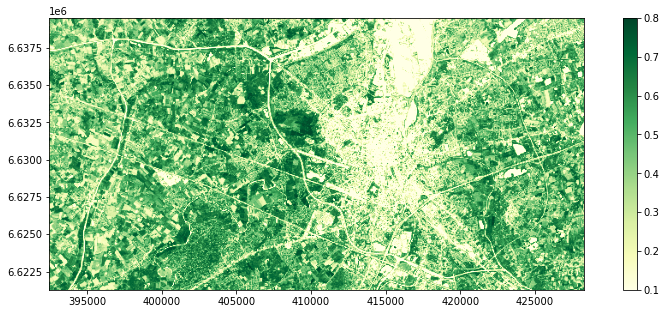

In [135]:
# A Sequential colormap `YlGn` with a normalization on the color limits
import matplotlib.colors as mcolors
div_norm = mcolors.Normalize(0.1, 0.8)
fig, ax = plt.subplots(figsize=(14, 5))
ll = ax.imshow(ndvi, cmap="YlGn", extent=b4_extent, norm=div_norm)
fig.colorbar(ll);

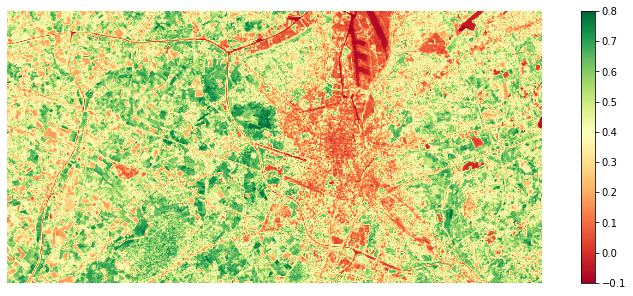

In [102]:
# A Diverging colormap `RdYlGn` with a normalization on the color limits in two directions of the central point:
div_norm = mcolors.TwoSlopeNorm(vmin=-0.1, vcenter=0.4, vmax=0.8)
fig, ax = plt.subplots(figsize=(14, 5))
ll = ax.imshow(ndvi, cmap="RdYlGn", extent=b4_extent, norm=div_norm)
fig.colorbar(ll);
plt.axis('off');

---

## For the curious: Some more building blocks

Numpy provides lower-level building blocks used by other packages and you will once in a also need to rely on these functions to do some custom implementation. Some other useful building blocks with repect to reclassification could potentially help you:

- Remember the `np.where` function?

In [103]:
dummy = np.arange(1, 10).reshape(3, 3)
dummy

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [104]:
np.where(dummy > 4, 0, dummy)

array([[1, 2, 3],
       [4, 0, 0],
       [0, 0, 0]])

- Clip the values in yanour array to defined limits can be done using `np.clip`

In [105]:
dummy = np.arange(1, 10).reshape(3, 3)
dummy

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [106]:
np.clip(dummy, 2, 6)

array([[2, 2, 3],
       [4, 5, 6],
       [6, 6, 6]])

- Numpy provides also a `np.histogram` function, which is really useful to get the bincounts over a custom bin-set:

In [107]:
np.histogram(b4_data_classified, bins=[5, 15, 25, 35])

(array([  2550, 139818,  55757]), array([ 5, 15, 25, 35]))

In [108]:
np.histogram(b4_data, bins=[0.001, 0.1, 0.2, 0.5])

(array([0, 0, 0]), array([0.001, 0.1  , 0.2  , 0.5  ]))

- The `np.digitize` function return the indices of the bins to which each value in input array belongs. As such, it can be used to select and manipulate values containing to a specific bin:

In [109]:
dummy = np.arange(9).reshape(3, 3)
np.random.shuffle(dummy)
dummy

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Define the bin to which each of the values belong to, using the bins x<2, 2<=x<4, x>=4:

In [110]:
id_mask = np.digitize(dummy, bins=[2, 4])
id_mask

array([[0, 0, 1],
       [1, 2, 2],
       [2, 2, 2]])

In [111]:
dummy[id_mask == 1] = 20
dummy

array([[ 0,  1, 20],
       [20,  4,  5],
       [ 6,  7,  8]])

Besides, it is also a practical method to create discrete classified maps:

  1. Apply digitize to create classes:

In [112]:
ndvi_class_bins = [-np.inf, 0, 0.3, np.inf]  # These limits are for demo purposes only 
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

  2. Define custom colors and names:

In [115]:
nbr_colors = ["gray", "yellowgreen", "g"]
ndvi_names = ["No Vegetation", "Bare Area", "Vegetation"]

  3. Prepare Matplotlib elements:

In [119]:
nbr_cmap = ListedColormap(nbr_colors)
# fake entries required for each class to create the legend
dummy_data = [Line2D([0], [0], color=color, lw=4) for color in nbr_colors]  

  4. Make the plot and add a legend:

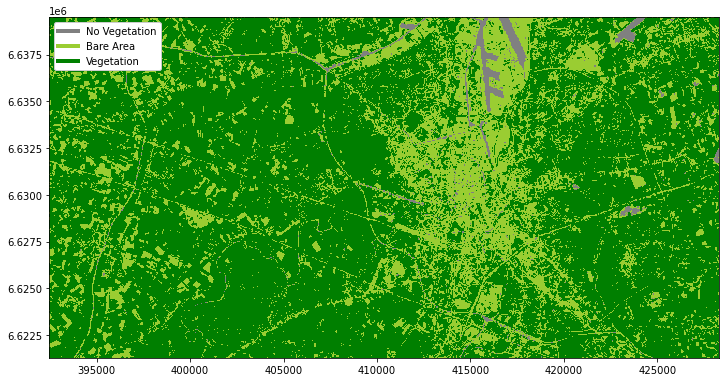

In [120]:
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap, extent=b4_data_extent)
ax.legend(dummy_data, ndvi_names, loc='upper left', framealpha=1)

- Find the modal (most common) value in an array is not provided by Numpy itself, but is available in the Scipy package:

In [121]:
from scipy.stats import mode

In [122]:
mode(b4_data.flatten()), mode(b4_data_classified.flatten())

(ModeResult(mode=array([4220], dtype=uint16), count=array([367])),
 ModeResult(mode=array([20]), count=array([139818])))

### Side-note on convolution

In case you need custom convolutions for your 2D array, check the `scipy.signal.convolve` function as the Numpy function only works for 1-D arrays.

In [127]:
from scipy import signal

In [128]:
with rasterio.open("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff") as src:
    b4_data = src.read()
    b4_data_extent
b4_data = b4_data.squeeze().astype(float)

As an example, apply a low pass filter example as window, smoothing the image:

In [129]:
window = np.ones((5, 5), dtype=int)
window[1:-1, 1:-1] = 4
window[2, 2] = 12
window

array([[ 1,  1,  1,  1,  1],
       [ 1,  4,  4,  4,  1],
       [ 1,  4, 12,  4,  1],
       [ 1,  4,  4,  4,  1],
       [ 1,  1,  1,  1,  1]])

In [130]:
grad = signal.convolve(b4_data, window, mode='same')

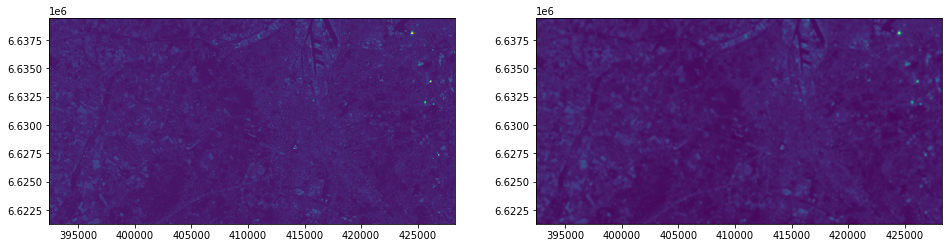

In [131]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))
ax0.imshow(b4_data, extent=b4_data_extent)
ax1.imshow(grad, extent=b4_data_extent)